# Sentiment Analysis of Spotify App Review using ML model - positive & negative sentiment

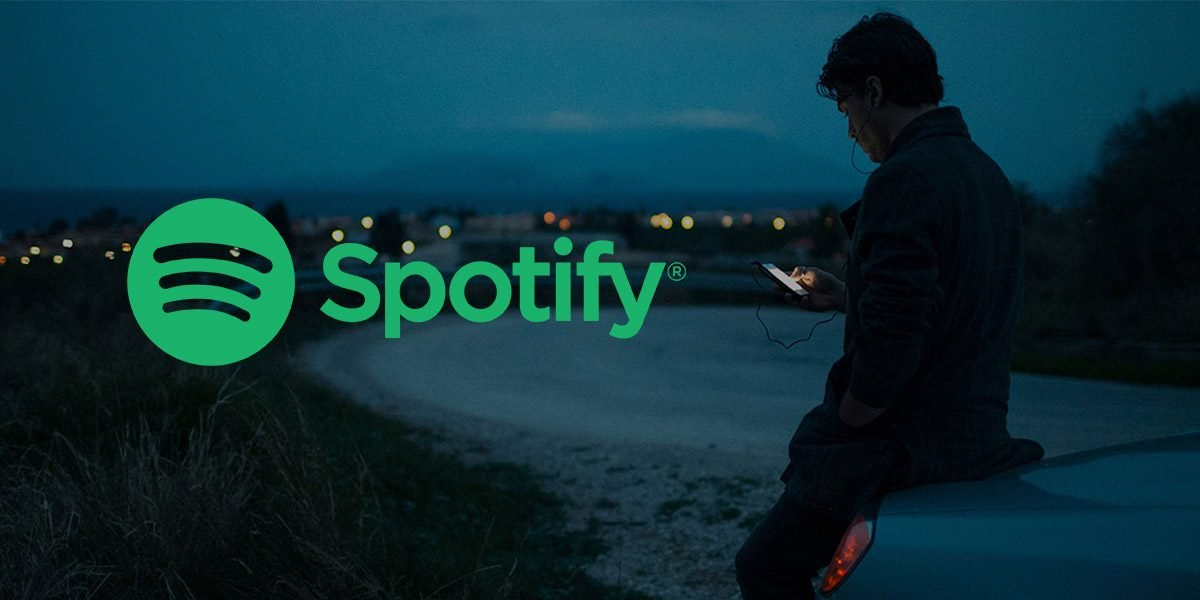

***

## Few Installations

In [1]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.4 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import nltk
import re
import contractions
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

## Reading the dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data=pd.read_csv('/content/drive/MyDrive/Sentiment analysis/reviews.csv')
data.head(3)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN


In [8]:
data=data[['Review','Rating']]
data

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  61594 non-null  object
 1   Rating  61594 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 962.5+ KB


In [10]:
data.nunique()

Review    61356
Rating        5
dtype: int64

In [11]:
sorted(data.Rating.unique())

[1, 2, 3, 4, 5]

# Data Preprocessing

In [12]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [13]:
data.duplicated().sum()

201

In [14]:
data=data.drop_duplicates()
data

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


In [15]:
def text_preprocessing(text):
  text=contractions.fix(text.lower())
  text=re.sub('[^a-zA-Z\s]','',text)
  text=" ".join([wrd for wrd in text.split() if wrd not in stopwords])
  text=" ".join([lemma.lemmatize(wrd) for wrd in text.split()])
  return text

In [16]:
data.Review=[text_preprocessing(sen) for sen in data.Review]

In [17]:
#3,4,5->positive(i.e 1)
data.loc[data['Rating']>=3,'label'] = 1

#1,2->negative
data.loc[data['Rating']<3,'label'] = 0

In [18]:
data

,Review,Rating,label
0,great music service audio high quality app eas...,5,1.0
1,please ignore previous negative rating app sup...,5,1.0
2,popup get best spotify experience android anno...,4,1.0
3,really buggy terrible use recently,1,0.0
4,dear spotify get song put playlist shuffle play,1,0.0
...,...,...,...
61589,even though communicated lyric feature availab...,1,0.0
61590,use sooo good back downloaded free version cou...,1,0.0
61591,app would good taking device start comp spotif...,2,0.0
61592,app good hard navigate let play song click pla...,2,0.0


In [19]:
pos=[nltk.pos_tag([wrd for wrd in sen.split()]) for sen in data.Review]
pos

[[('great', 'JJ'),
  ('music', 'NN'),
  ('service', 'NN'),
  ('audio', 'RB'),
  ('high', 'JJ'),
  ('quality', 'NN'),
  ('app', 'VBP'),
  ('easy', 'JJ'),
  ('use', 'NN'),
  ('also', 'RB'),
  ('quick', 'RB'),
  ('friendly', 'JJ'),
  ('support', 'NN')],
 [('please', 'VB'),
  ('ignore', 'RB'),
  ('previous', 'JJ'),
  ('negative', 'JJ'),
  ('rating', 'NN'),
  ('app', 'JJ'),
  ('super', 'JJ'),
  ('great', 'JJ'),
  ('give', 'JJ'),
  ('five', 'CD'),
  ('star', 'NN')],
 [('popup', 'NN'),
  ('get', 'VB'),
  ('best', 'JJS'),
  ('spotify', 'NN'),
  ('experience', 'NN'),
  ('android', 'NN'),
  ('annoying', 'VBG'),
  ('please', 'JJ'),
  ('let', 'VB'),
  ('u', 'JJ'),
  ('get', 'VB'),
  ('rid', 'JJ')],
 [('really', 'RB'),
  ('buggy', 'JJ'),
  ('terrible', 'JJ'),
  ('use', 'NN'),
  ('recently', 'RB')],
 [('dear', 'JJ'),
  ('spotify', 'NN'),
  ('get', 'NN'),
  ('song', 'NN'),
  ('put', 'VBD'),
  ('playlist', 'NN'),
  ('shuffle', 'NN'),
  ('play', 'NN')],
 [('player', 'NN'),
  ('control', 'NN'),
  ('some

## Data Visualization

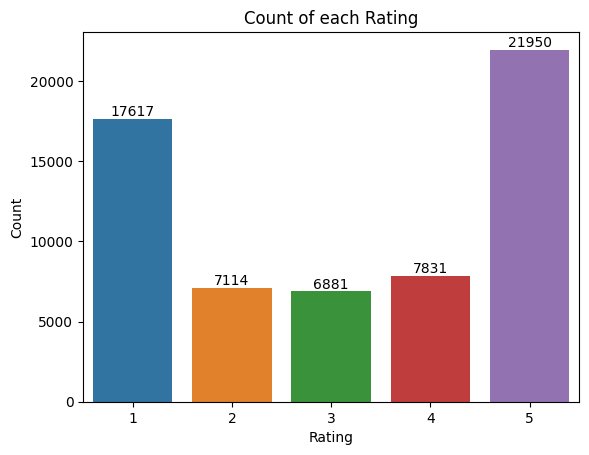

In [20]:
rate=data.Rating.value_counts()
ax=sns.barplot(x=rate.index,y=rate.values)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of each Rating')
plt.show()

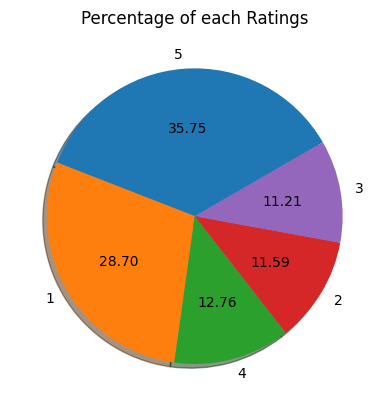

In [21]:
plt.pie(x=rate,autopct="%.2f",labels=rate.index,startangle=30,
       shadow=True)
plt.title('Percentage of each Ratings')
plt.show()

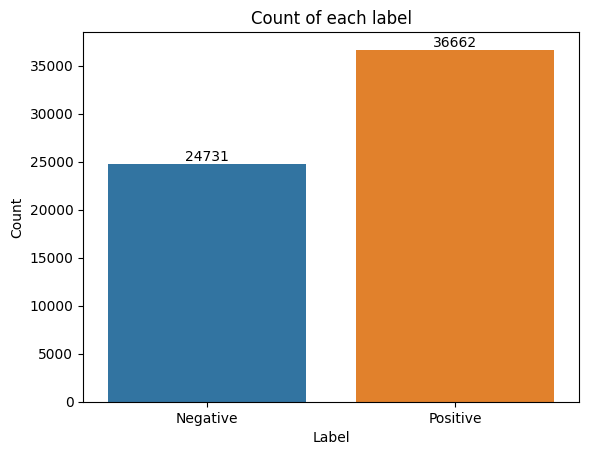

In [22]:
lab=data.label.value_counts()
ax=sns.barplot(x=lab.index,y=lab.values)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0,1],['Negative','Positive'])
plt.title('Count of each label')
plt.show()

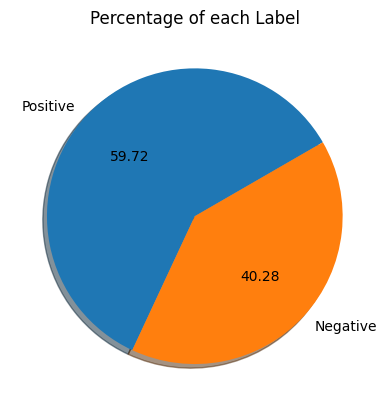

In [23]:
plt.pie(x=lab,autopct="%.2f",labels=['Positive','Negative'],startangle=30,
       shadow=True)
plt.title('Percentage of each Label')
plt.show()

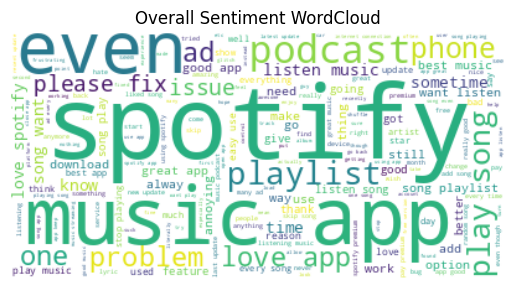

In [24]:
text=" ".join([sen for sen in data.Review])
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Overall Sentiment WordCloud")
plt.show()

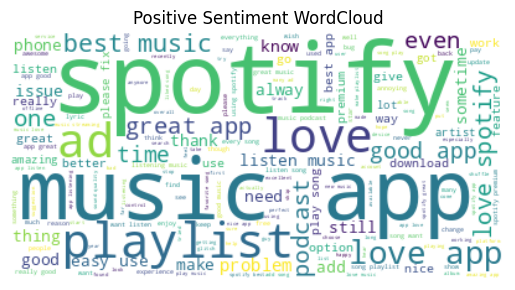

In [25]:
positive=' '.join(word for word in data['Review'][data['label']==1].astype(str))
wordcloud = WordCloud(background_color = 'white').generate(positive)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment WordCloud")
plt.show()

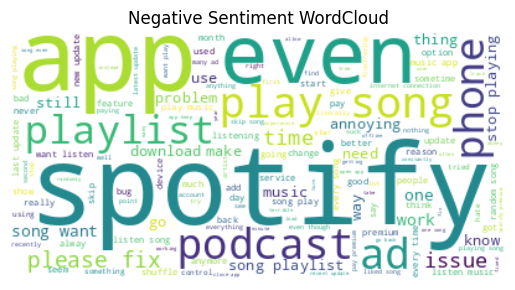

In [26]:
negative=' '.join(word for word in data['Review'][data['label']==0].astype(str))
wordcloud = WordCloud(background_color = 'white').generate(negative)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment WordCloud")
plt.show()

## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = data['Review']
y = data.label

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, shuffle=True)

In [30]:
X_train

29633                      banging app getting better time
20136               love app alot using year app wonderful
57456       fixed rating since fixed issue previous update
50545    longer connects kenwood spotify app car blueto...
30302                       listen spotify daily hour year
                               ...                        
12167    amazing app support team reply fast take le da...
57390    good use time one thing repeat button really b...
14206                         love free music ad hard deal
56287    spotify support misinformation pay quit paid s...
38604    new update broke music controller click music ...
Name: Review, Length: 42975, dtype: object

In [31]:
y_train

29633    1.0
20136    1.0
57456    1.0
50545    0.0
30302    1.0
        ... 
12167    1.0
57390    1.0
14206    1.0
56287    0.0
38604    1.0
Name: label, Length: 42975, dtype: float64

## Model Selection

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score,f1_score

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
acc=pd.DataFrame({'Model':[],'Training Accuracy':[],'Testing Accuracy':[],'f1 score':[],'Recall':[],
                  'Precision':[],'Cross validation Score':[]})
acc

,Model,Training Accuracy,Testing Accuracy,f1 score,Recall,Precision,Cross validation Score


- ### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
final_lr=Pipeline([("Vect",TfidfVectorizer()),
                    ("model",LogisticRegression(solver='lbfgs',random_state=120))])

In [38]:
final_lr.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model', LogisticRegression(random_state=120))])

In [39]:
y_pred=final_lr.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 0., 1.])

In [40]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      7649
         1.0       0.84      0.87      0.86     10769

    accuracy                           0.83     18418
   macro avg       0.82      0.82      0.82     18418
weighted avg       0.83      0.83      0.83     18418



In [41]:
y_train_pred=final_lr.predict(X_train)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
cross_val=cross_val_score(final_lr,X_train,y_train,cv=10).mean()

In [42]:
print(f"Training Accuracy Score = {train_acc}")
print(f"Testing Accuracy Score = {test_acc}")
print(f"f1 score = {f1}")
print(f"Recall = {recall}")
print(f"Precision = {precision}")
print(f'Cross Validation Score = {cross_val}')

Training Accuracy Score = 0.855543920884235
Testing Accuracy Score = 0.8287001846020198
f1 score = 0.8553614816852335
Recall = 0.844712060847519
Precision = 0.8662828489181911
Cross Validation Score = 0.8281559320499451


In [43]:
acc.loc[1]=["Logistic Regression",train_acc, test_acc,f1,recall,precision,cross_val]
acc

,Model,Training Accuracy,Testing Accuracy,f1 score,Recall,Precision,Cross validation Score
1,Logistic Regression,0.855544,0.8287,0.855361,0.844712,0.866283,0.828156


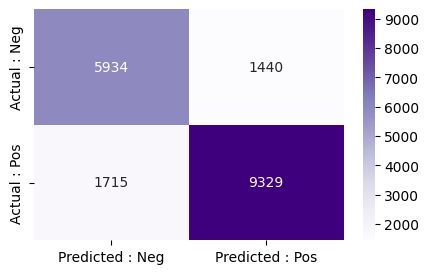

In [44]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted : Neg', 'Predicted : Pos'],
                           index =['Actual : Neg', 'Actual : Pos'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

- ### SGD

In [45]:
from sklearn.linear_model import SGDClassifier

In [46]:
final_sgd=Pipeline([("Vect",TfidfVectorizer()),
               ("model",SGDClassifier())])

In [47]:
final_sgd.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()), ('model', SGDClassifier())])

In [48]:
y_pred=final_sgd.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 0., 1.])

In [49]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80      8111
         1.0       0.83      0.88      0.85     10307

    accuracy                           0.83     18418
   macro avg       0.83      0.82      0.83     18418
weighted avg       0.83      0.83      0.83     18418



In [50]:
y_train_pred=final_sgd.predict(X_train)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
cross_val=cross_val_score(final_sgd,X_train,y_train,cv=10).mean()

In [51]:
print(f"Training Accuracy Score = {train_acc}")
print(f"Testing Accuracy Score = {test_acc}")
print(f"f1 score = {f1}")
print(f"Recall = {recall}")
print(f"Precision = {precision}")
print(f'Cross Validation Score = {cross_val}')

Training Accuracy Score = 0.8493077370564281
Testing Accuracy Score = 0.8309805624932132
f1 score = 0.854198866563627
Recall = 0.8256972111553785
Precision = 0.8847385272145144
Cross Validation Score = 0.8293427145650005


In [52]:
acc.loc[2]=["SGD",train_acc, test_acc,f1,recall,precision,cross_val]
acc

,Model,Training Accuracy,Testing Accuracy,f1 score,Recall,Precision,Cross validation Score
1,Logistic Regression,0.855544,0.828700,0.855361,0.844712,0.866283,0.828156
2,SGD,0.849308,0.830981,0.854199,0.825697,0.884739,0.829343


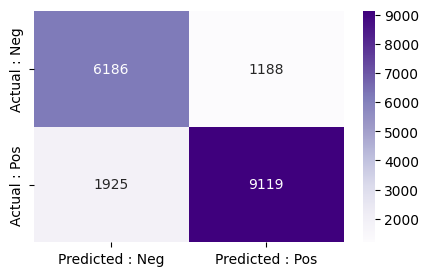

In [53]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted : Neg', 'Predicted : Pos'],
                           index =['Actual : Neg', 'Actual : Pos'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

- ### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
final_dt=Pipeline([("Vect",TfidfVectorizer()),
               ("model",DecisionTreeClassifier(random_state=150))])

In [56]:
final_dt.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model', DecisionTreeClassifier(random_state=150))])

In [57]:
y_pred=final_dt.predict(X_test)
y_pred

array([0., 0., 1., ..., 1., 1., 1.])

In [58]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.68      0.67      0.67      7403
         1.0       0.78      0.78      0.78     11015

    accuracy                           0.74     18418
   macro avg       0.73      0.73      0.73     18418
weighted avg       0.74      0.74      0.74     18418



In [59]:
y_train_pred=final_dt.predict(X_train)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
cross_val=cross_val_score(final_dt,X_train,y_train,cv=10).mean()

In [60]:
print(f"Training Accuracy Score = {train_acc}")
print(f"Testing Accuracy Score = {test_acc}")
print(f"f1 score = {f1}")
print(f"Recall = {recall}")
print(f"Precision = {precision}")
print(f'Cross Validation Score = {cross_val}')

Training Accuracy Score = 0.9989761489237929
Testing Accuracy Score = 0.7387881420349658
f1 score = 0.7819030781087084
Recall = 0.7808764940239044
Precision = 0.782932364956877
Cross Validation Score = 0.7372194101677743


In [61]:
acc.loc[3]=["Decision Tree",train_acc, test_acc,f1,recall,precision,cross_val]
acc

,Model,Training Accuracy,Testing Accuracy,f1 score,Recall,Precision,Cross validation Score
1,Logistic Regression,0.855544,0.828700,0.855361,0.844712,0.866283,0.828156
2,SGD,0.849308,0.830981,0.854199,0.825697,0.884739,0.829343
3,Decision Tree,0.998976,0.738788,0.781903,0.780876,0.782932,0.737219


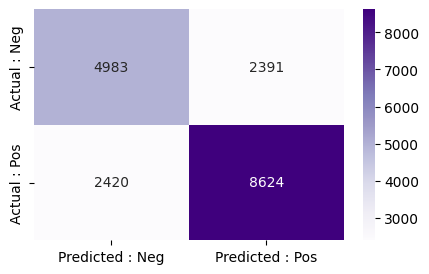

In [62]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted : Neg', 'Predicted : Pos'],
                           index =['Actual : Neg', 'Actual : Pos'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

- ### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
final_rf=Pipeline([("Vect",TfidfVectorizer()),
               ("model",RandomForestClassifier(random_state=150))])

In [65]:
final_rf.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model', RandomForestClassifier(random_state=150))])

In [66]:
y_pred=final_rf.predict(X_test)
y_pred

array([0., 1., 1., ..., 1., 0., 0.])

In [67]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.74      0.78      8031
         1.0       0.81      0.87      0.84     10387

    accuracy                           0.81     18418
   macro avg       0.81      0.80      0.81     18418
weighted avg       0.81      0.81      0.81     18418



In [68]:
y_train_pred=final_rf.predict(X_train)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
cross_val=cross_val_score(final_rf,X_train,y_train,cv=10).mean()

In [69]:
print(f"Training Accuracy Score = {train_acc}")
print(f"Testing Accuracy Score = {test_acc}")
print(f"f1 score = {f1}")
print(f"Recall = {recall}")
print(f"Precision = {precision}")
print(f'Cross Validation Score = {cross_val}')

Training Accuracy Score = 0.9989528795811519
Testing Accuracy Score = 0.8126289499402758
f1 score = 0.8389715832205683
Recall = 0.8140166606302065
Precision = 0.8655049581207278
Cross Validation Score = 0.8136826931209271


In [70]:
acc.loc[4]=["Random Forest",train_acc, test_acc,f1,recall,precision,cross_val]
acc

,Model,Training Accuracy,Testing Accuracy,f1 score,Recall,Precision,Cross validation Score
1,Logistic Regression,0.855544,0.828700,0.855361,0.844712,0.866283,0.828156
2,SGD,0.849308,0.830981,0.854199,0.825697,0.884739,0.829343
3,Decision Tree,0.998976,0.738788,0.781903,0.780876,0.782932,0.737219
4,Random Forest,0.998953,0.812629,0.838972,0.814017,0.865505,0.813683


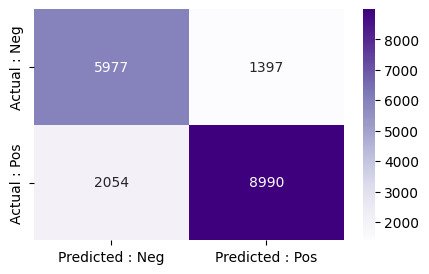

In [71]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted : Neg', 'Predicted : Pos'],
                           index =['Actual : Neg', 'Actual : Pos'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

* ### XGBoost

In [72]:
from xgboost import XGBClassifier

In [73]:
final_xg=Pipeline([("Vect",TfidfVectorizer()),
               ("model",XGBClassifier(random_state=70))])

In [74]:
final_xg.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=70, ...))])

In [75]:
y_pred=final_xg.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [76]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      7590
           1       0.84      0.85      0.84     10828

    accuracy                           0.82     18418
   macro avg       0.81      0.81      0.81     18418
weighted avg       0.81      0.82      0.81     18418



In [77]:
y_train_pred=final_xg.predict(X_train)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
cross_val=cross_val_score(final_xg,X_train,y_train,cv=10).mean()

In [78]:
print(f"Training Accuracy Score = {train_acc}")
print(f"Testing Accuracy Score = {test_acc}")
print(f"f1 score = {f1}")
print(f"Recall = {recall}")
print(f"Precision = {precision}")
print(f'Cross Validation Score = {cross_val}')

Training Accuracy Score = 0.867411285631181
Testing Accuracy Score = 0.8151808013899446
f1 score = 0.8443672275054864
Recall = 0.8361101050344079
Precision = 0.8527890653860362
Cross Validation Score = 0.815241573952977


In [79]:
acc.loc[5]=["XGBoost",train_acc, test_acc,f1,recall,precision,cross_val]
acc

,Model,Training Accuracy,Testing Accuracy,f1 score,Recall,Precision,Cross validation Score
1,Logistic Regression,0.855544,0.828700,0.855361,0.844712,0.866283,0.828156
2,SGD,0.849308,0.830981,0.854199,0.825697,0.884739,0.829343
3,Decision Tree,0.998976,0.738788,0.781903,0.780876,0.782932,0.737219
4,Random Forest,0.998953,0.812629,0.838972,0.814017,0.865505,0.813683
5,XGBoost,0.867411,0.815181,0.844367,0.836110,0.852789,0.815242


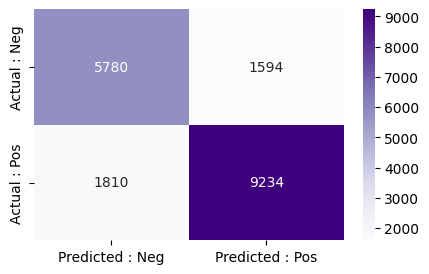

In [80]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted : Neg', 'Predicted : Pos'],
                           index =['Actual : Neg', 'Actual : Pos'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

- ### LGBM

In [81]:
from lightgbm import LGBMClassifier

In [82]:
final_lgbm=Pipeline([("Vect",TfidfVectorizer()),
               ("model",LGBMClassifier(random_state=70))])

In [83]:
final_lgbm.fit(X_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()),
                ('model', LGBMClassifier(random_state=70))])

In [84]:
y_pred=final_lgbm.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 0., 1.])

In [85]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78      7665
         1.0       0.83      0.86      0.84     10753

    accuracy                           0.82     18418
   macro avg       0.81      0.81      0.81     18418
weighted avg       0.82      0.82      0.82     18418



In [86]:
y_train_pred=final_lgbm.predict(X_train)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
cross_val=cross_val_score(final_lgbm,X_train,y_train,cv=10).mean()

In [87]:
print(f"Training Accuracy Score = {train_acc}")
print(f"Testing Accuracy Score = {test_acc}")
print(f"f1 score = {f1}")
print(f"Recall = {recall}")
print(f"Precision = {precision}")
print(f'Cross Validation Score = {cross_val}')

Training Accuracy Score = 0.8444677137870855
Testing Accuracy Score = 0.8165381691823217
f1 score = 0.8449786667890077
Recall = 0.8338464324520102
Precision = 0.8564121640472426
Cross Validation Score = 0.8191739981566457


In [88]:
acc.loc[6]=["LGBM",train_acc, test_acc,f1,recall,precision,cross_val]
acc

,Model,Training Accuracy,Testing Accuracy,f1 score,Recall,Precision,Cross validation Score
1,Logistic Regression,0.855544,0.828700,0.855361,0.844712,0.866283,0.828156
2,SGD,0.849308,0.830981,0.854199,0.825697,0.884739,0.829343
3,Decision Tree,0.998976,0.738788,0.781903,0.780876,0.782932,0.737219
4,Random Forest,0.998953,0.812629,0.838972,0.814017,0.865505,0.813683
5,XGBoost,0.867411,0.815181,0.844367,0.836110,0.852789,0.815242
6,LGBM,0.844468,0.816538,0.844979,0.833846,0.856412,0.819174


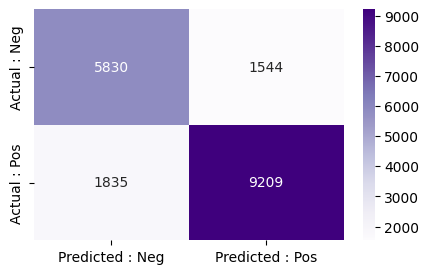

In [89]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted : Neg', 'Predicted : Pos'],
                           index =['Actual : Neg', 'Actual : Pos'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

## Conclusion

In [90]:
acc

,Model,Training Accuracy,Testing Accuracy,f1 score,Recall,Precision,Cross validation Score
1,Logistic Regression,0.855544,0.828700,0.855361,0.844712,0.866283,0.828156
2,SGD,0.849308,0.830981,0.854199,0.825697,0.884739,0.829343
3,Decision Tree,0.998976,0.738788,0.781903,0.780876,0.782932,0.737219
4,Random Forest,0.998953,0.812629,0.838972,0.814017,0.865505,0.813683
5,XGBoost,0.867411,0.815181,0.844367,0.836110,0.852789,0.815242
6,LGBM,0.844468,0.816538,0.844979,0.833846,0.856412,0.819174


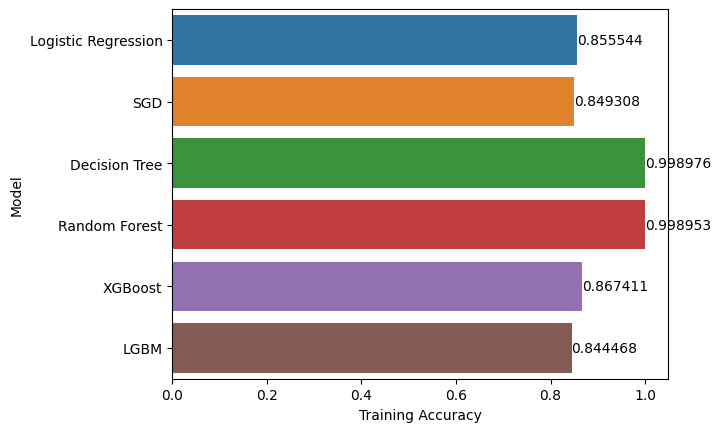

In [91]:
ax=sns.barplot(y='Model',x='Training Accuracy',data=acc)
for i in ax.containers:
    ax.bar_label(i)

> _From the above barplot, we observe that Decision Tree and Random Forest have the highest training accuracy among all the models i.e 0.99_

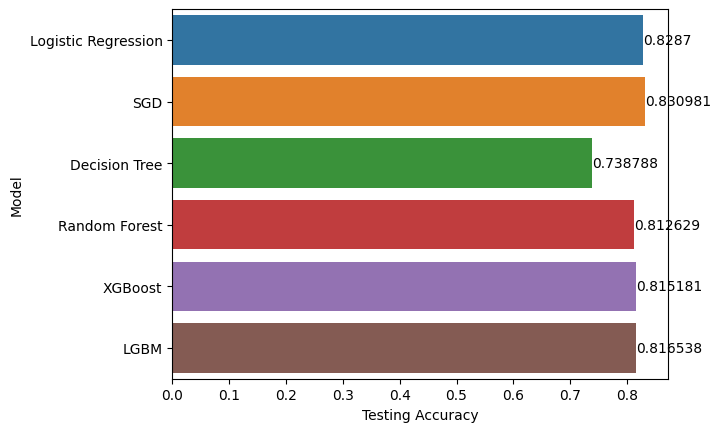

In [92]:
ax=sns.barplot(y='Model',x='Testing Accuracy',data=acc)
for i in ax.containers:
    ax.bar_label(i)

> _From the above barplot, we observe that SGD have the highest testing accuracy among all the models i.e 0.81_

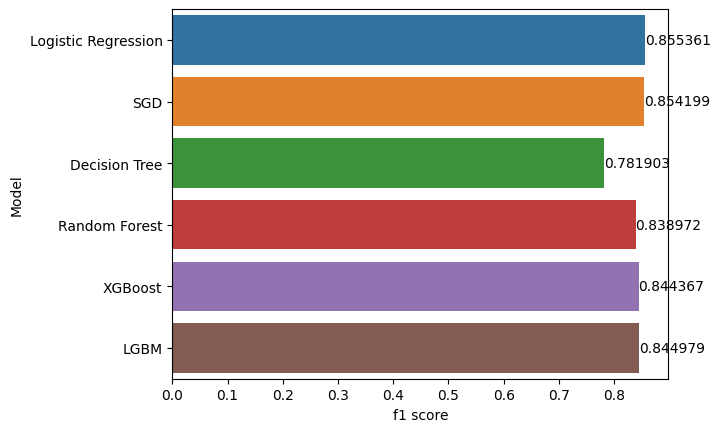

In [93]:
ax=sns.barplot(y='Model',x='f1 score',data=acc)
for i in ax.containers:
    ax.bar_label(i)

> _From the above barplot, we observe that Logistic Regression and SGD has the highest f1 score among all the models i.e 0.85_

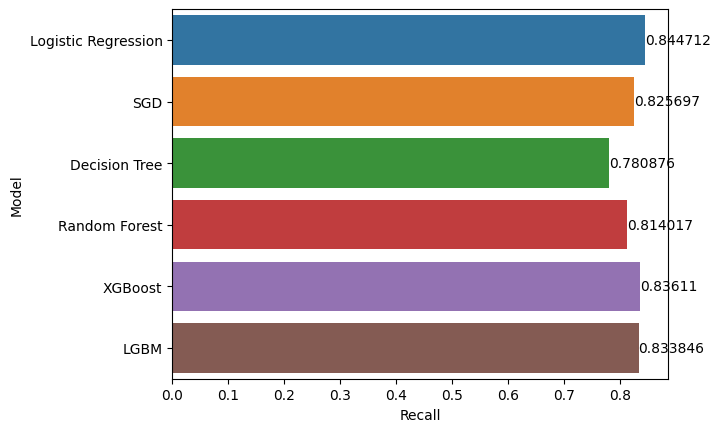

In [94]:
ax=sns.barplot(y='Model',x='Recall',data=acc)
for i in ax.containers:
    ax.bar_label(i)

> _From the above barplot, we observe that Logistic Regression has the highest Recall among all the models i.e 0.84_

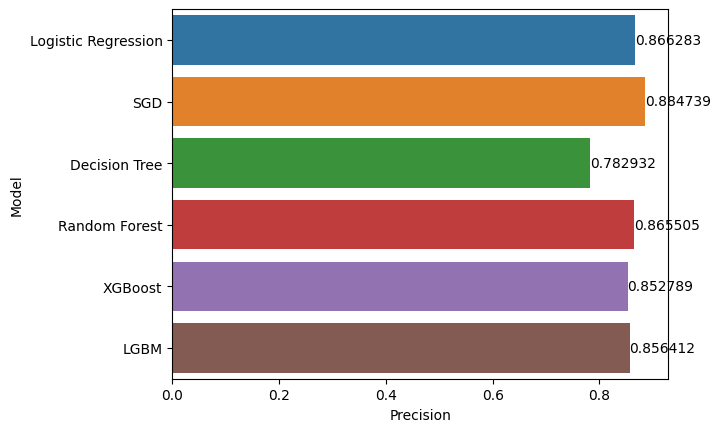

In [95]:
ax=sns.barplot(y='Model',x='Precision',data=acc)
for i in ax.containers:
    ax.bar_label(i)

> _From the above barplot, we observe that SGD has the highest Precision among all the models i.e 0.88_

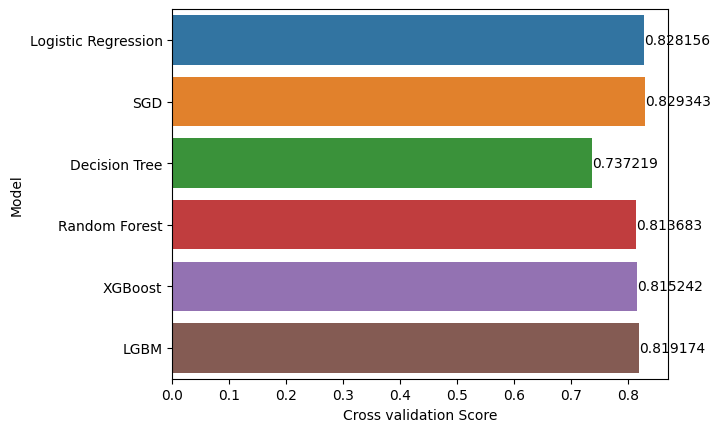

In [96]:
ax=sns.barplot(y='Model',x='Cross validation Score',data=acc)
for i in ax.containers:
    ax.bar_label(i)

> _From the above barplot, we observe that Logistic Regression and SGD have the highest cross validation score among all the models i.e 0.82_

## Prediction

In [97]:
def predict(sen):
    pred=final_lr.predict([sen])
    if pred[0]==1 :
        print("POSITIVE")
    else:
        print("NEGATIVE")

In [98]:
predict("i love app")

POSITIVE


In [99]:
predict("bad app")

NEGATIVE
